In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
fig_size = np.array([0,0])
%matplotlib inline
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


f1 = pd.read_csv('rho100T1000z0.014.txt',delimiter=',')

In [ ]:
f1.

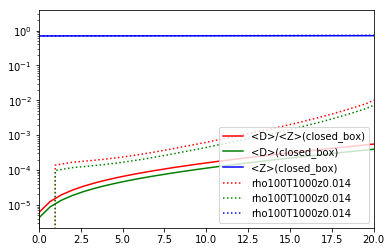

In [3]:
#Initiation de parametres                                                                                                                           
E_o=0.0 #outflow parameter                                                                                                                          
SFR = 1/3./3.0816e16 #star formation rate                                                                                                           
R = 0.46 #return fraction                                                                                                                           
Mg_in = 0.0* 0.1 /3.0816e16*9.4e-1 #incoming mass_je voulez cette valeur et il est tres importante                                                  
Z_in = 0.014 #metallicity                                                                                                                         
D = 0. #par definition                                                                                                                              
y = 0.069 #reviennes de supernova(                                                                                                                  
y_d = 6.9e-4 #poussiere de supernova(Supernova Dust)                                                                                                
E_SNe = 10. #Supernova efficiency                                                                                                                   
gamma = 3.e4 #ratio of the depletion times                                                                                                          
timestep = 1.0/1500.0*1.e9*86400.*365 #ans a seconds                                                                                                 
r_z = 0.25 #entrant poussiere de ISM                                                                                                                

#initiation de parametres                                                                                                                           
Mg = np.arange(0.00000000, 0.10001, 0.0005)
Mz = Mg.copy()
Md = Mg.copy()
Z = Mg.copy()
D = Mg.copy()
t = Mg.copy()

#Conditions d'initiations                                                                                                                           
#Mz[0] = Z*Mg[0]                                                                                                                                    
Z[0]=Z_in
Mg[0] = 2.314
Mz[0] = Z_in*Mg[0]
Md[0] = 0.0
t[0] = 0.0
Zsun = 0.02

#Equations                                                                                                                                          
for i in range (0,200):

        Mg_dot = Mg_in-(1.-R+E_o)*SFR*Mg[i]#Equation de gas mass                                                                                    

        Mz_dot = ((y-Z[i])*(1.-R)-Z[i]*E_o)*SFR*Mg[i] + r_z*Z[i]*Mg_in #Equation de Dust  
       
       
        Md_dot = (y_d*(1.0-R)-D[i]*(1.0+E_SNe+E_o))*SFR*Mg[i] + gamma*D[i]*(0.7*Z[i]-D[i])*SFR*Mg[i]

        if i==20000:
                break;
        else :
                Mg[i+1] = Mg[i]+Mg_dot*timestep
                Mz[i+1] = Mz[i]+Mz_dot*timestep
                Md[i+1] = Md[i]+Md_dot*timestep
                Z[i+1] = Mz[i+1]/Mg[i+1]
                D[i+1] = Md[i+1]/Mg[i+1]
        t[i+1] = i*timestep
#Mz[1]=Mz[0]                                                                                                                                        
#Z[20001]=Z[20000]                                                                                                                                  
#D[20001]=D[20000]                                                                                                                                  
#t[20001]=t[20000]                                                                                                                                  
plt.plot(t/1.e6/86400./365.,D/Z,color="red", linewidth=1.5, linestyle="-", label="<D>/<Z>(closed_box)")
plt.plot(t/1.e6/86400./365.,D/Zsun,color="green", linewidth=1.5, linestyle="-", label="<D>(closed_box)")
plt.plot(t/1.e6/86400./365.,Z/Zsun,color="blue", linewidth=1.5, linestyle="-", label="<Z>(closed_box)")
plt.yscale('log')
plt.plot(f1['Time']*977813239./1.e6,f1['Dust']/f1['Metallicity'],color="red", linewidth=1.5, linestyle=":", label="rho100T1000z0.014")
plt.plot(f1['Time']*977813239./1.e6,f1['Dust']/f1['Gas']/Zsun,color="green", linewidth=1.5, linestyle=":", label="rho100T1000z0.014")
plt.plot(f1['Time']*977813239./1.e6,f1['Metallicity']/f1['Gas']/Zsun,color="blue", linewidth=1.5, linestyle=":", label="rho100T1000z0.014")
plt.xlim([0, 20])

plt.legend(loc='lower right')
#0.5208-SFR                                                                                                                                         
#7.8124-Mg       


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


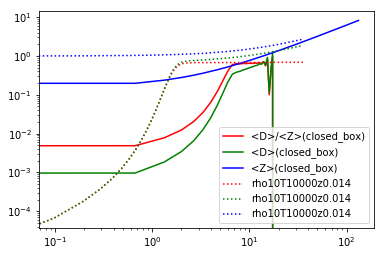

In [5]:
f2 = pd.read_csv('check.txt',delimiter=',')
#Initiation de parametres                                                                                                                           
E_o=0.0 #outflow parameter                                                                                                                          
SFR = 1/3./5.4e14 #star formation rate                                                                                                           
R = 0.46 #return fraction                                                                                                                           
Mg_in = 0.0* 0.1 /3.0816e16*9.4e-1 #incoming mass_je voulez cette valeur et il est tres importante                                                  
Z_in = 0.0014 #metallicity                                                                                                                         
D = 0. #par definition                                                                                                                              
y = 0.069 #reviennes de supernova(                                                                                                                  
y_d = 6.9e-4 #poussiere de supernova(Supernova Dust)                                                                                                
E_SNe = 10. #Supernova efficiency                                                                                                                   
gamma = 3.e4 #ratio of the depletion times                                                                                                          
timestep = 1.0/1500*1.e9*86400.*365 #ans a seconds                                                                                                 
r_z = 0.25 #entrant poussiere de ISM                                                                                                                

#initiation de parametres                                                                                                                           
Mg = np.arange(0.00000000, 0.10001, 0.0005)
Mz = Mg.copy()
Md = Mg.copy()
Z = Mg.copy()
D = Mg.copy()
t = Mg.copy()

#Conditions d'initiations                                                                                                                           
#Mz[0] = Z*Mg[0]                                                                                                                                    
Z[0]=Z_in
Mg[0] = 2.314
Mz[0] = Z_in*Mg[0]
Md[0] = 0.0
t[0] = 0.0

#Equations                                                                                                                                          
for i in range (0,200):

        Mg_dot = Mg_in-(1.-R+E_o)*SFR*Mg[i]#Equation de gas mass                                                                                    

        Mz_dot = ((y-Z[i])*(1.-R)-Z[i]*E_o)*SFR*Mg[i] + r_z*Z[i]*Mg_in #Equation de Dust  
       
       
        Md_dot = (y_d*(1.0-R)-D[i]*(1.0+E_SNe+E_o))*SFR*Mg[i] + gamma*D[i]*(0.7*Z[i]-D[i])*SFR*Mg[i]

        if i==20000:
                break;
        else :
                Mg[i+1] = Mg[i]+Mg_dot*timestep
                Mz[i+1] = Mz[i]+Mz_dot*timestep
                Md[i+1] = Md[i]+Md_dot*timestep
                Z[i+1] = Mz[i+1]/Mg[i+1]
                D[i+1] = Md[i+1]/Mg[i+1]
        t[i+1] = i*timestep
#Mz[1]=Mz[0]                                                                                                                                        
#Z[20001]=Z[20000]                                                                                                                                  
#D[20001]=D[20000]                                                                                                                                  
#t[20001]=t[20000]                                                                                                                                  
plt.plot(t/1.e6/86400./365.,D/Z,color="red", linewidth=1.5, linestyle="-", label="<D>/<Z>(closed_box)")
plt.plot(t/1.e6/86400./365.,D/0.012,color="green", linewidth=1.5, linestyle="-", label="<D>(closed_box)")
plt.plot(t/1.e6/86400./365.,Z/0.012,color="blue", linewidth=1.5, linestyle="-", label="<Z>(closed_box)")
plt.yscale('log')
plt.xscale('log')
plt.plot(f2['Time']*97781323.9/1.e6,f2['Dust']/f2['Metallicity'],color="red", linewidth=1.5, linestyle=":", label="rho10T10000z0.014")
plt.plot(f2['Time']*97781323.9/1.e6,f2['Dust']/f2['Gas']/0.014,color="green", linewidth=1.5, linestyle=":", label="rho10T10000z0.014")
plt.plot(f2['Time']*97781323.9/1.e6,f2['Metallicity']/f2['Gas']/0.014,color="blue", linewidth=1.5, linestyle=":", label="rho10T10000z0.014")


plt.legend(loc='lower right')
#0.5208-SFR                                                                                                                                         
#7.8124-Mg       




/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


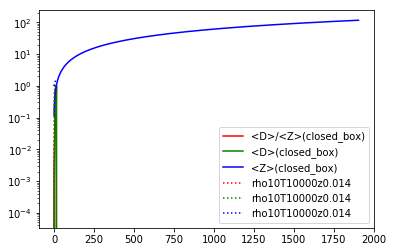

In [88]:
f2 = pd.read_csv('time_evolution.txt',delimiter=',')
#Initiation de parametres                                                                                                                           
E_o=0.0 #outflow parameter                                                                                                                          
SFR = 1/3./5.4e14 #star formation rate                                                                                                           
R = 0.46 #return fraction                                                                                                                           
Mg_in = 0.0* 0.1 /3.0816e16*9.4e-1 #incoming mass_je voulez cette valeur et il est tres importante                                                  
Z_in = 0.0014 #metallicity                                                                                                                         
D = 0. #par definition                                                                                                                              
y = 0.069 #reviennes de supernova(                                                                                                                  
y_d = 6.9e-4 #poussiere de supernova(Supernova Dust)                                                                                                
E_SNe = 10. #Supernova efficiency                                                                                                                   
gamma = 3.e4 #ratio of the depletion times                                                                                                          
timestep = 1.0/1050.0*1.e9*86400.*365 #ans a seconds                                                                                                 
r_z = 0.25 #entrant poussiere de ISM                                                                                                                

#initiation de parametres                                                                                                                           
Mg = np.arange(0.00000000, 0.10001, 0.00005)
Mz = Mg.copy()
Md = Mg.copy()
Z = Mg.copy()
D = Mg.copy()
t = Mg.copy()

#Conditions d'initiations                                                                                                                           
#Mz[0] = Z*Mg[0]                                                                                                                                    
Z[0]=Z_in
Mg[0] = 2.314
Mz[0] = Z_in*Mg[0]
Md[0] = 0.0
t[0] = 0.0

#Equations                                                                                                                                          
for i in range (0,2000):

        Mg_dot = Mg_in-(1.-R+E_o)*SFR*Mg[i]#Equation de gas mass                                                                                    

        Mz_dot = ((y-Z[i])*(1.-R)-Z[i]*E_o)*SFR*Mg[i] + r_z*Z[i]*Mg_in #Equation de Dust  
       
       
        Md_dot = (y_d*(1.0-R)-D[i]*(1.0+E_SNe+E_o))*SFR*Mg[i] + gamma*D[i]*(0.7*Z[i]-D[i])*SFR*Mg[i]

        if i==20000:
                break;
        else :
                Mg[i+1] = Mg[i]+Mg_dot*timestep
                Mz[i+1] = Mz[i]+Mz_dot*timestep
                Md[i+1] = Md[i]+Md_dot*timestep
                Z[i+1] = Mz[i+1]/Mg[i+1]
                D[i+1] = Md[i+1]/Mg[i+1]
        t[i+1] = i*timestep
#Mz[1]=Mz[0]                                                                                                                                        
#Z[20001]=Z[20000]                                                                                                                                  
#D[20001]=D[20000]                                                                                                                                  
#t[20001]=t[20000]                                                                                                                                  
plt.plot(t/1.e6/86400./365.,D/Z,color="red", linewidth=1.5, linestyle="-", label="<D>/<Z>(closed_box)")
plt.plot(t/1.e6/86400./365.,D/0.012,color="green", linewidth=1.5, linestyle="-", label="<D>(closed_box)")
plt.plot(t/1.e6/86400./365.,Z/0.012,color="blue", linewidth=1.5, linestyle="-", label="<Z>(closed_box)")
plt.yscale('log')
plt.plot(f2['Time']*97781323.9/1.e6,f2['Dust']/f2['Metallicity'],color="red", linewidth=1.5, linestyle=":", label="rho10T10000z0.014")
plt.plot(f2['Time']*97781323.9/1.e6,f2['Dust']/f2['Gas']/0.014,color="green", linewidth=1.5, linestyle=":", label="rho10T10000z0.014")
plt.plot(f2['Time']*97781323.9/1.e6,f2['Metallicity']/f2['Gas']/0.014,color="blue", linewidth=1.5, linestyle=":", label="rho10T10000z0.014")


plt.legend(loc='lower right')
#0.5208-SFR                                                                                                                                         
#7.8124-Mg       





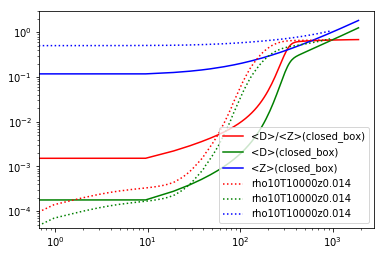

In [4]:
f2 = pd.read_csv('rho10T1000z0.007.txt',delimiter=',')
#Initiation de parametres                                                                                                                           
E_o=0.0 #outflow parameter                                                                                                                          
SFR = 1/3./3.0816e16 #star formation rate                                                                                                           
R = 0.46 #return fraction                                                                                                                           
Mg_in = 0.0* 0.1 /3.0816e16*9.4e-1 #incoming mass_je voulez cette valeur et il est tres importante                                                  
Z_in = 0.0014 #metallicity                                                                                                                         
D = 0. #par definition                                                                                                                              
y = 0.069 #reviennes de supernova(                                                                                                                  
y_d = 6.9e-4 #poussiere de supernova(Supernova Dust)                                                                                                
E_SNe = 10. #Supernova efficiency                                                                                                                   
gamma = 3.e4 #ratio of the depletion times                                                                                                          
timestep = 1.0/105.0*1.e9*86400.*365 #ans a seconds                                                                                                 
r_z = 0.25 #entrant poussiere de ISM                                                                                                                

#initiation de parametres                                                                                                                           
Mg = np.arange(0.00000000, 0.10001, 0.0005)
Mz = Mg.copy()
Md = Mg.copy()
Z = Mg.copy()
D = Mg.copy()
t = Mg.copy()

#Conditions d'initiations                                                                                                                           
#Mz[0] = Z*Mg[0]                                                                                                                                    
Z[0]=Z_in
Mg[0] = 2.314
Mz[0] = Z_in*Mg[0]
Md[0] = 0.0
t[0] = 0.0

#Equations                                                                                                                                          
for i in range (0,200):

        Mg_dot = Mg_in-(1.-R+E_o)*SFR*Mg[i]#Equation de gas mass                                                                                    

        Mz_dot = ((y-Z[i])*(1.-R)-Z[i]*E_o)*SFR*Mg[i] + r_z*Z[i]*Mg_in #Equation de Dust  
       
       
        Md_dot = (y_d*(1.0-R)-D[i]*(1.0+E_SNe+E_o))*SFR*Mg[i] + gamma*D[i]*(0.7*Z[i]-D[i])*SFR*Mg[i]

        if i==20000:
                break;
        else :
                Mg[i+1] = Mg[i]+Mg_dot*timestep
                Mz[i+1] = Mz[i]+Mz_dot*timestep
                Md[i+1] = Md[i]+Md_dot*timestep
                Z[i+1] = Mz[i+1]/Mg[i+1]
                D[i+1] = Md[i+1]/Mg[i+1]
        t[i+1] = i*timestep
#Mz[1]=Mz[0]                                                                                                                                        
#Z[20001]=Z[20000]                                                                                                                                  
#D[20001]=D[20000]                                                                                                                                  
#t[20001]=t[20000]                                                                                                                                  
plt.plot(t/1.e6/86400./365.,D/Z,color="red", linewidth=1.5, linestyle="-", label="<D>/<Z>(closed_box)")
plt.plot(t/1.e6/86400./365.,D/0.014,color="green", linewidth=1.5, linestyle="-", label="<D>(closed_box)")
plt.plot(t/1.e6/86400./365.,Z/0.014,color="blue", linewidth=1.5, linestyle="-", label="<Z>(closed_box)")
plt.yscale('log')
plt.xscale('log')
plt.plot(f2['Time']*977813239./1.e6,f2['Dust']/f2['Metallicity'],color="red", linewidth=1.5, linestyle=":", label="rho10T10000z0.014")
plt.plot(f2['Time']*977813239./1.e6,f2['Dust']/f2['Gas']/0.014,color="green", linewidth=1.5, linestyle=":", label="rho10T10000z0.014")
plt.plot(f2['Time']*977813239./1.e6,f2['Metallicity']/f2['Gas']/0.014,color="blue", linewidth=1.5, linestyle=":", label="rho10T10000z0.014")


plt.legend(loc='lower right')
#0.5208-SFR                                                                                                                                         
#7.8124-Mg       






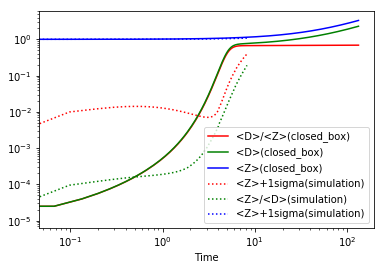

In [2]:
f2 = pd.read_csv('time_rho10.txt',delimiter=',')
#Initiation de parametres                                                                                                                           
E_o=0.0 #outflow parameter                                                                                                                          
SFR = 0.1/3./1.6e14 #star formation rate                                                                                                           
R = 0.46 #return fraction                                                                                                                           
Mg_in = 0.0* 0.1 /3.0816e11*9.4e-1 #incoming mass_je voulez cette valeur et il est tres importante                                                  
Z_in = 0.014 #metallicity                                                                                                                         
D = 0. #par definition                                                                                                                              
y = 0.069 #reviennes de supernova(                                                                                                                  
y_d = 6.9e-4 #poussiere de supernova(Supernova Dust)                                                                                                
E_SNe = 10. #Supernova efficiency                                                                                                                   
gamma = 3.e4 #ratio of the depletion times                                                                                                          
timestep = 1.0/15000*1.e9*86400.*365 #ans a seconds                                                                                                 
r_z = 0.25 #entrant poussiere de ISM                                                                                                                

#initiation de parametres                                                                                                                           
Mg = np.arange(0.00000000, 0.10001, 0.00005)
Mz = Mg.copy()
Md = Mg.copy()
Z = Mg.copy()
D = Mg.copy()
t = Mg.copy()

#Conditions d'initiations                                                                                                                           
#Mz[0] = Z*Mg[0]                                                                                                                                    
Z[0]=Z_in
Mg[0] = 2.314
Mz[0] = Z_in*Mg[0]
Md[0] = 0.0
t[0] = 0.0

#Equations                                                                                                                                          
for i in range (0,2000):

        Mg_dot = Mg_in-(1.-R+E_o)*SFR*Mg[i]#Equation de gas mass                                                                                    

        Mz_dot = ((y-Z[i])*(1.-R)-Z[i]*E_o)*SFR*Mg[i] + r_z*Z[i]*Mg_in #Equation de Dust  
       
       
        Md_dot = (y_d*(1.0-R)-D[i]*(1.0+E_SNe+E_o))*SFR*Mg[i] + gamma*D[i]*(0.7*Z[i]-D[i])*SFR*Mg[i]

        if i==20000:
                break;
        else :
                Mg[i+1] = Mg[i]+Mg_dot*timestep
                Mz[i+1] = Mz[i]+Mz_dot*timestep
                Md[i+1] = Md[i]+Md_dot*timestep
                Z[i+1] = Mz[i+1]/Mg[i+1]
                D[i+1] = Md[i+1]/Mg[i+1]
        t[i+1] = i*timestep
#Mz[1]=Mz[0]                                                                                                                                        
#Z[20001]=Z[20000]                                                                                                                                  
#D[20001]=D[20000]                                                                                                                                  
#t[20001]=t[20000]                                                                                                                                  
plt.plot(t/1.e6/86400./365.,D/Z,color="red", linewidth=1.5, linestyle="-", label="<D>/<Z>(closed_box)")
plt.plot(t/1.e6/86400./365.,D/0.014,color="green", linewidth=1.5, linestyle="-", label="<D>(closed_box)")
plt.plot(t/1.e6/86400./365.,Z/0.014,color="blue", linewidth=1.5, linestyle="-", label="<Z>(closed_box)")
plt.yscale('log')
plt.xscale('log')
plt.plot(f2['Time']*97781323.9/1.e6,(f2['Dust']+ f2['Dust_std'])/f2['Gas']/0.014,color="red", linewidth=1.5, linestyle=":", label="<Z>+1sigma(simulation)")

#plt.plot(f2['Time']*97781323.9/1.e6,f2['Dust']/f2['Metallicity'],color="", linewidth=1.5, linestyle=":", label="<D>/<Z>rho10T10000z0.014")
plt.plot(f2['Time']*97781323.9/1.e6,f2['Dust']/f2['Gas']/0.014,color="green", linewidth=1.5, linestyle=":", label="<Z>/<D>(simulation)")
#plt.plot(f2['Time']*97781323.9/1.e6,f2['Metallicity']/f2['Gas']/0.014,color="blue", linewidth=1.5, linestyle=":", label="<Z>rho10T10000z0.014")
plt.plot(f2['Time']*97781323.9/1.e6,(f2['Metallicity']+ f2['Metallicity_std'])/f2['Gas']/0.014,color="blue", linewidth=1.5, linestyle=":", label="<Z>+1sigma(simulation)")

#plt.rc('xtick', labelsize=0) 
#plt.rc('ytick', labelsize=0) 
plt.xlabel("Time")
plt.legend(loc='lower right')


#0.5208-SFR                                                                                                                                         
#7.8124-Mg       

In [3]:
plt.plot(f3['Metallicity']/f3['Gas']/0.014/2.303,f3['Gas']/2.314/2.303,color="red", linewidth=1.5, linestyle=":", label="<D>/<Z>rho10T10000z0.014")
plt.plot(Z/0.014/2.303,((Mg)/2.314/2.303
                       ),color="green", linewidth=1.5, linestyle="-", label="<Z>")
plt.xlabel("Metallicity")
plt.legend(loc='lower right')
#plt.xscale("log")
#plt.yscale("log")
plt.xscale('log')

NameError: name 'f3' is not defined

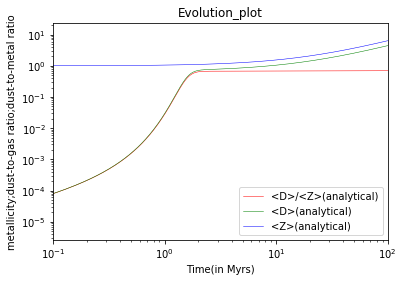

In [7]:
f3 = pd.read_csv('check.txt',delimiter=',')
#Initiation de parametres                                                                                                                           
E_o=0.0 #outflow parameter                                                                                                                          
SFR = 0.1/3./5.2e13 #star formation rate                                                                                                           
R = 0.46 #return fraction                                                                                                                           
Mg_in = 0.0* 0.1 /6.0816e16*9.4e-1 #incoming mass_je voulez cette valeur et il est tres importante                                                  
Z_in = 0.014 #metallicity                                                                                                                         
D = 0. #par definition                                                                                                                              
y = 0.069 #reviennes de supernova(                                                                                                                  
y_d = 6.9e-4 #poussiere de supernova(Supernova Dust)                                                                                                
E_SNe = 10. #Supernova efficiency                                                                                                                   
gamma = 3.e4 #ratio of the depletion times                                                                                                          
timestep = 0.01/1*1.0e6*86400.*365 #ans a seconds                                                                                                 
r_z = 0.25 #entrant poussiere de ISM                                                                                                                

#initiation de parametres                                                                                                                           
Mg = np.arange(0.00000000, 0.10001, 0.000005)
Mz = Mg.copy()
Md = Mg.copy()
Z = Mg.copy()
D = Mg.copy()
t = Mg.copy()
g_ln = Mg.copy()
z_ln = Mg.copy()

#Conditions d'initiations                                                                                                                           
#Mz[0] = Z*Mg[0]                                                                                                                                    
Z[0]=Z_in
Mg[0] = 2.314
Mz[0] = Z_in*Mg[0]
Md[0] = 0.0
t[0] = 0.0

#Equations                                                                                                                                          
for i in range (0,20000):

        Mg_dot = Mg_in-(1.-R+E_o)*SFR*Mg[i]#Equation de gas mass                                                                                    

        Mz_dot = ((y-Z[i])*(1.-R)-Z[i]*E_o)*SFR*Mg[i] + r_z*Z[i]*Mg_in #Equation de Dust  
       
        g_ln[i] = math.log(Mg[i]/2.314)
        z_ln[i] = Z[i]
        Md_dot = (y_d*(1.0-R)-D[i]*(1.0+E_SNe+E_o))*SFR*Mg[i] + gamma*D[i]*(0.7*Z[i]-D[i])*SFR*Mg[i]

        if i==20000:
                break;
        else :
                Mg[i+1] = Mg[i]+Mg_dot*timestep
                Mz[i+1] = Mz[i]+Mz_dot*timestep
                Md[i+1] = Md[i]+Md_dot*timestep
                Z[i+1] = Mz[i+1]/Mg[i+1]
                D[i+1] = Md[i+1]/Mg[i+1] 
        t[i+1] = i*timestep
#Mz[1]=Mz[0]                                                                                                                                        
Z[-1]=Z[-2]                                                                                                                                  
D[-1]=D[-2]                                                                                                                                  
t[-1]=t[-2]                                                                                                                                  
plt.plot(t/1.e6/86400./365.,D/Z,color="red", linewidth=0.5, linestyle="-", label="<D>/<Z>(analytical)")
plt.plot(t/1.e6/86400./365.,D/0.014,color="green", linewidth=0.5, linestyle="-", label="<D>(analytical)")
plt.plot(t/1.e6/86400./365.,Z/0.014,color="blue", linewidth=0.5, linestyle="-", label="<Z>(analytical)")
plt.yscale('log')
plt.xscale("log")
#plt.plot(f3['Time']*97781323.9/1.e6,f3['Dust']/f3['Metallicity'],color="red", linewidth=1.5, linestyle=":", label="<D>/<Z>(simulation)")
#plt.plot(f3['Time']*97781323.9/1.e6,f3['Dust']/f3['Gas']/0.014,color="green", linewidth=1.5, linestyle=":", label="<D>(simulation)")
#plt.plot(f3['Time']*97781323.9/1.e6,f3['Metallicity']/f3['Gas']/0.014,color="blue", linewidth=1.5, linestyle=":", label="<Z>(simulation)")
#plt.plot(f2['Time']*97781323.9/1.e6,(f2['Dust'])/f2['Metallicity'],color="red", linewidth=0.5, linestyle="-.", label="<D>/<Z>rho10T10000z0.014")
#plt.plot(f2['Time']*97781323.9/1.e6,(f2['Dust']+f2['Dust_std']) /f2['Gas']/0.014,color="green", linewidth=1.5, linestyle="-.", label="<D>rho10T10000z0.014")
#plt.plot(f2['Time']*97781323.9/1.e6,(f2['Metallicity']+ f2['Metallicity_std'])/f2['Gas']/0.014,color="blue", linewidth=1.5, linestyle="-", label="<Z>rho10T10000z0.014")

#plt.plot(f2['Time']*97781323.9/1.e6,(f2['Dust']) /f2['Gas']/0.014,color="green", linewidth=1.5, linestyle=":", label="<D>rho10T10000z0.014")
#plt.plot(f2['Time']*97781323.9/1.e6,(f2['Metallicity']-f2['Metallicity_std'])/f2['Gas']/0.014,color="red", linewidth=1.5, linestyle="--", label="<Z>rho10T10000z0.014")



plt.xlabel("Time(in Myrs)")
plt.ylabel("metallicity;dust-to-gas ratio;dust-to-metal ratio")
plt.legend(loc='lower right')
plt.xlim(0.1,100)
plt.title("Evolution_plot")

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0.01, 0.03)

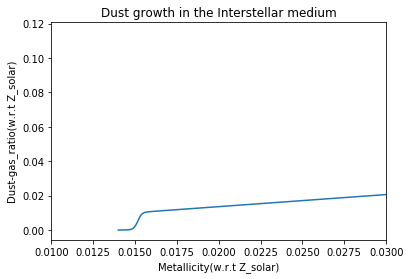

In [5]:
plt.plot(Z,D)
plt.xlabel('Metallicity(w.r.t Z_solar)')
plt.ylabel('Dust-gas_ratio(w.r.t Z_solar)')
plt.legend(loc='lower right')
plt.title("Dust growth in the Interstellar medium")
plt.xlim(0.01,0.03)

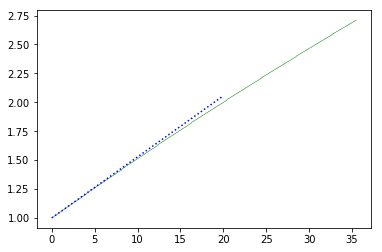

In [31]:
plt.plot(f3['Time']*97781323.9/1.e6,f3['Metallicity']/f3['Gas']/0.014,color="green", linewidth=0.5, linestyle="-", label="<D>rho10T10000z0.014")
plt.plot(t/1.e6/86400./365.,Z/0.014,color="blue", linewidth=1.5, linestyle=":", label="<Z>(closed_box)")

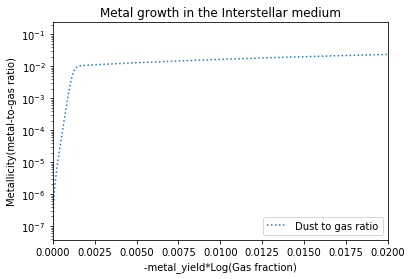

In [12]:
g_ln[-2]=g_ln[-3]

g_ln[-1]=g_ln[-3]
#plt.plot(-g_ln,Z-0.014,linestyle="-",label="(Z-0.014)")
plt.plot(Z-0.014,D,linestyle=":",label="Dust to gas ratio")
plt.xlabel('Metallicity(metal-to-gas ratio)')
plt.ylabel('Metallicity(metal-to-gas ratio)')
plt.legend(loc='lower right')
plt.title("Metal growth in the Interstellar medium")
plt.xlim(0.00,0.02)
plt.yscale('log')

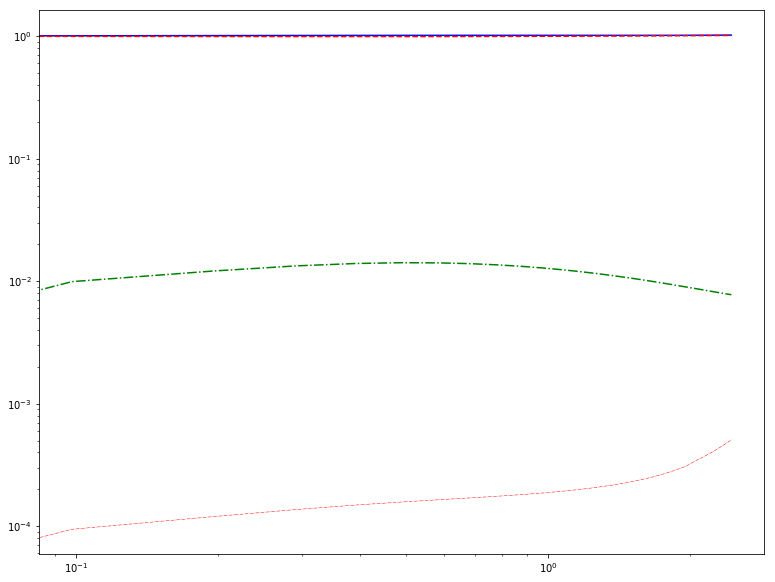

In [37]:
plt.plot(f2['Time']*97781323.9/1.e6,(f2['Dust'])/f2['Gas']/0.014,color="red", linewidth=0.5, linestyle="-.", label="<D>/<Z>rho10T10000z0.014")
plt.plot(f2['Time']*97781323.9/1.e6,(f2['Dust']+f2['Dust_std']) /f2['Gas']/0.014,color="green", linewidth=1.5, linestyle="-.", label="<D>rho10T10000z0.014")
plt.plot(f2['Time']*97781323.9/1.e6,(f2['Metallicity']+ f2['Metallicity_std'])/f2['Gas']/0.014,color="blue", linewidth=1.5, linestyle="-", label="<Z>rho10T10000z0.014")

plt.plot(f2['Time']*97781323.9/1.e6,(f2['Dust']-f2['Dust_std']) /f2['Gas']/0.014,color="green", linewidth=1.5, linestyle=":", label="<D>rho10T10000z0.014")
plt.plot(f2['Time']*97781323.9/1.e6,(f2['Metallicity']-f2['Metallicity_std'])/f2['Gas']/0.014,color="red", linewidth=1.5, linestyle="--", label="<Z>rho10T10000z0.014")
plt.xscale("log")
plt.yscale("log")


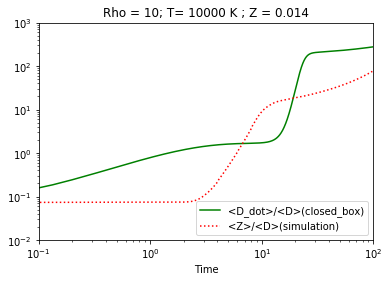

In [15]:
f3 = pd.read_csv('rho100T1000z0.014.txt',delimiter=',')
#Initiation de parametres                                                                                                                           
E_o=0.0 #outflow parameter                                                                                                                          
SFR = 0.1/3./5.2e14 #star formation rate                                                                                                           
R = 0.46 #return fraction                                                                                                                           
Mg_in = 0.0* 0.1 /3.0816e11*9.4e-1 #incoming mass_je voulez cette valeur et il est tres importante                                                  
Z_in = 0.014 #metallicity                                                                                                                         
D = 0. #par definition                                                                                                                              
y = 0.069 #reviennes de supernova(                                                                                                                  
y_d = 6.9e-4 #poussiere de supernova(Supernova Dust)                                                                                                
E_SNe = 10. #Supernova efficiency                                                                                                                   
gamma = 3.e4 #ratio of the depletion times                                                                                                          
timestep = 1.0/15000*1.e9*86400.*365 #ans a seconds                                                                                                 
r_z = 0.25 #entrant poussiere de ISM                                                                                                                

#initiation de parametres                                                                                                                           
Mg = np.arange(0.00000000, 0.10001, 0.00005)
Mz = Mg.copy()
Md = Mg.copy()
Z = Mg.copy()
D = Mg.copy()
t = Mg.copy()
d = Mg.copy()

#Conditions d'initiations                                                                                                                           
#Mz[0] = Z*Mg[0]                                                                                                                                    
Z[0]=Z_in
Mg[0] = 23.14
Mz[0] = Z_in*Mg[0]
Md[0] = 0.0
t[0] = 0.0
d2_dot = np.zeros(1000)
#Equations                                                                                                                                          
for i in range (0,2000):

        Mg_dot = Mg_in-(1.-R+E_o)*SFR*Mg[i]#Equation de gas mass                                                                                    

        Mz_dot = ((y-Z[i])*(1.-R)-Z[i]*E_o)*SFR*Mg[i] + r_z*Z[i]*Mg_in #Equation de Dust  
       
       
        Md_dot = (y_d*(1.0-R)-D[i]*(1.0+E_SNe+E_o))*SFR*Mg[i] + gamma*D[i]*(0.7*Z[i]-D[i])*SFR*Mg[i]

        if i==20000:
                break;
        else :
                Mg[i+1] = Mg[i]+Mg_dot*timestep
                Mz[i+1] = Mz[i]+Mz_dot*timestep
                Md[i+1] = Md[i]+Md_dot*timestep
                Z[i+1] = Mz[i+1]/Mg[i+1]
                D[i+1] = Md[i+1]/Mg[i+1]
                d[i]= (y_d*(1.0-R)-D[i]*(R+E_SNe+E_o))*SFR + gamma*D[i]*(0.7*Z[i]-D[i])*SFR
        t[i+1] = i*timestep
for j in range(0,999):
    #d2_dot[j] = (f3['Dust'][j+1]/f3['Gas'][j+1]-f3['Dust'][j]/f3['Gas'][j])/(f3['Time'][j+1]*97781323.9*86400.*365-f3['Time'][j]*97781323.9*86400.*365)
    d2_dot[j] = (y_d*(1.0-R)-f3['Dust'][j]*(1.0+E_SNe+E_o))*SFR + gamma*f3['Dust'][j]*(0.7*f3['Metallicity'][j]-f3['Dust'][j])*SFR/f3['Gas'][j]
#Mz[1]=Mz[0]                                                                                                                                        
#Z[20001]=Z[20000]                                                                                                                                  
#D[20001]=D[20000]                                                                                                                                  
#t[20001]=t[20000]                                                                                                                                  
plt.plot(t/1.e6/86400./365.,D/d/1.e6/86400./365.,color="green", linewidth=1.5, linestyle="-", label="<D_dot>/<D>(closed_box)")
#plt.plot(t/1.e6/86400./365.,D/0.014,color="green", linewidth=1.5, linestyle="-", label="<D>(closed_box)")
#plt.plot(t/1.e6/86400./365.,Z/0.014,color="blue", linewidth=1.5, linestyle="-", label="<Z>(closed_box)")
plt.yscale('log')
plt.xscale('log')
#plt.plot(f3['Time']*97781323.9/1.e6,(f3['Dust']+ f3['Dust_std'])/f3['Gas']/0.014,color="green", linewidth=1.5, linestyle=":", label="<D>+1sigma(simulation)")
#plt.plot(f2['Time']*97781323.9/1.e6,(,color="green", linewidth=1.5, linestyle="-.", label="<D>(simulation)")

#plt.plot(f2['Time']*97781323.9/1.e6,f2['Dust']/f2['Metallicity'],color="", linewidth=1.5, linestyle=":", label="<D>/<Z>rho10T10000z0.014")
plt.plot(f3['Time']*97781323.9/1.e6,f3['Dust']/d2_dot/f3['Gas']/1.e6/86400./365.,color="red", linewidth=1.5, linestyle=":", label="<Z>/<D>(simulation)")
#plt.plot(f2['Time']*97781323.9/1.e6,f2['Metallicity']/f2['Gas']/0.014,color="blue", linewidth=1.5, linestyle=":", label="<Z>rho10T10000z0.014")
#plt.plot(f3['Time']*97781323.9/1.e6,(f3['Metallicity']+ f3['Metallicity_std'])/f3['Gas']/0.014,color="blue", linewidth=1.5, linestyle=":", label="<Z>+1sigma(simulation)")
#plt.plot(f2['Time']*97781323.9/1.e6,(f3['Metallicity'])/f3['Gas']/0.014,color="blue", linewidth=1.5, linestyle="-.", label="<Z>(simulation)")

plt.xlabel("Time")
plt.legend(loc='lower right')
plt.xlim(0.1,100)
plt.ylim(1.e-2,1000)
plt.title("Rho = 10; T= 10000 K ; Z = 0.014")
plt.savefig("rho10T10000z0.014.png")

In [6]:
a = f3['Dust']+f3['Metallicity']

(0.01, 1000)

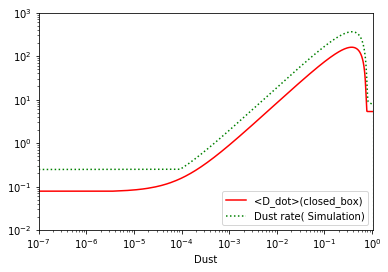

In [12]:
plt.plot(D/0.014,d*1.e6*86400.*365.*1.e5,color="red", linewidth=1.5, linestyle="-", label="<D_dot>(closed_box)")
plt.plot(f3['Dust']/f3['Gas']/0.014,d2_dot*1.e6*86400.*365.*1.e5,color="green", linewidth=1.5, linestyle=":", label="Dust rate( Simulation)")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Dust')
plt.legend(loc='lower right')
plt.xlim(0.0000001,1.07)
plt.ylim(1.e-2,1000)
#D dot = rate of change of Dust ration(y axis)
#D  = dust-gasratio(x axis)

In [22]:
f3.describe()

,Time,Electron,Hydride_ion,Hydrogen_atom,Helium,Hydrogen,Hydrogen_ion,Helium_ion,H2+,HE++,Stars,avg_v,std_v,Coolingtime,Metallicity_std,Dust_std,Temperature,Gas,Dust,Metallicity
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.0,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.499500,1.453782e-07,1.510977e-10,0.736983,0.259570,3.061353e-03,0.000219,1.402993e-04,3.219533e-11,2.634322e-05,0.0,1.252911,1.895267,4.860945e+14,0.000965,0.001532,267.692106,2.171715,0.024471,0.039811
std,0.288819,1.972727e-06,2.048844e-09,0.002785,0.001969,3.982809e-04,0.002950,1.356017e-03,4.396667e-10,8.213804e-04,0.0,1.796023,1.983793,3.155282e+13,0.000228,0.001932,467.217296,0.072949,0.008205,0.003705
min,0.000000,1.455192e-09,1.082191e-20,0.657972,0.207781,1.082191e-20,0.000002,6.579826e-07,1.082191e-20,1.000000e-20,0.0,0.001084,0.106516,0.000000e+00,0.000000,0.000000,0.000000,2.053999,0.000000,0.032396
25%,0.249750,3.456226e-09,2.165806e-13,0.736968,0.259721,2.927613e-03,0.000005,4.883930e-06,2.618071e-15,1.000000e-20,0.0,0.327948,0.805102,4.828668e+14,0.000996,0.000760,159.454656,2.108954,0.024762,0.036872
50%,0.499500,5.096574e-09,3.868512e-13,0.737149,0.259729,3.090122e-03,0.000008,7.116033e-06,5.402029e-15,1.000000e-20,0.0,0.710110,1.266525,4.994902e+14,0.001072,0.000765,189.754254,2.167068,0.027186,0.040129
75%,0.749250,1.087050e-08,1.195093e-12,0.737302,0.259732,3.267961e-03,0.000016,1.524170e-05,2.151972e-14,1.000000e-20,0.0,1.361313,2.072520,5.045123e+14,0.001080,0.000773,261.832159,2.230378,0.029238,0.043007
max,0.999000,5.540160e-05,3.907117e-08,0.738197,0.259736,4.059720e-03,0.082247,2.597259e-02,8.215858e-09,2.597259e-02,0.0,14.066719,24.065715,5.076131e+14,0.001090,0.008418,8097.539832,2.314000,0.031105,0.045626


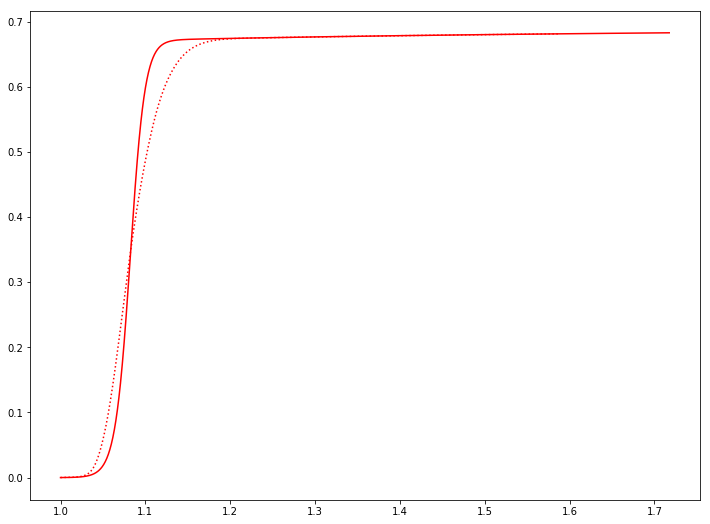

In [58]:
plt.plot(Z/0.014,D/Z,color="red", linewidth=1.5, linestyle="-", label="<D_dot>/<D>(closed_box)")
plt.plot(f3['Metallicity']/f3['Gas']/0.014,f3['Dust']/f3['Metallicity'],color="red", linewidth=1.5, linestyle=":", label="<Z>/<D>(simulation)")


(0.1, 100)

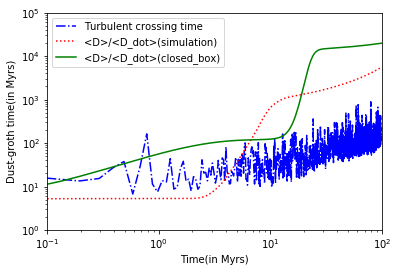

In [18]:
plt.plot(f3['Time']*97781323.9/1.e6,1/f3['std_v']*97781323.9/1.e6,color="blue", linewidth=1.5, linestyle="-.", label="Turbulent crossing time")
#plt.plot(f2['Time']*97781323.9/1.e6,1/f5['avg_v']*97781323.9/1.e6,color="red", linewidth=1.5, linestyle="-.", label="<Z>(simulation)")
plt.plot(f3['Time']*97781323.9/1.e6,f3['Dust']/d2_dot/f3['Gas']/1.e6/86400./365./0.014,color="red", linewidth=1.5, linestyle=":", label="<D>/<D_dot>(simulation)")
#plt.plot(f3['Time']*97781323.9/1.e6,f3['Dust']/d2_dot/f3['Gas']/1.e6/86400./365./0.014,color="red", linewidth=1.5, linestyle=":", label="<Z>/<D>(simulation)")
#plt.plot(t/1.e6/86400./365.,D/Z,color="blue", linewidth=1.5, linestyle="-", label="<D>/<Z>(closed_box)")
plt.plot(t/1.e6/86400./365.,D/d/1.e6/86400./365./0.014,color="green", linewidth=1.5, linestyle="-", label="<D>/<D_dot>(closed_box)")
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlabel("Time(in Myrs)")
plt.ylabel("Dust-groth time(in Myrs)")
plt.xscale('log')
plt.ylim(1,100000)
plt.xlim(0.1,100)

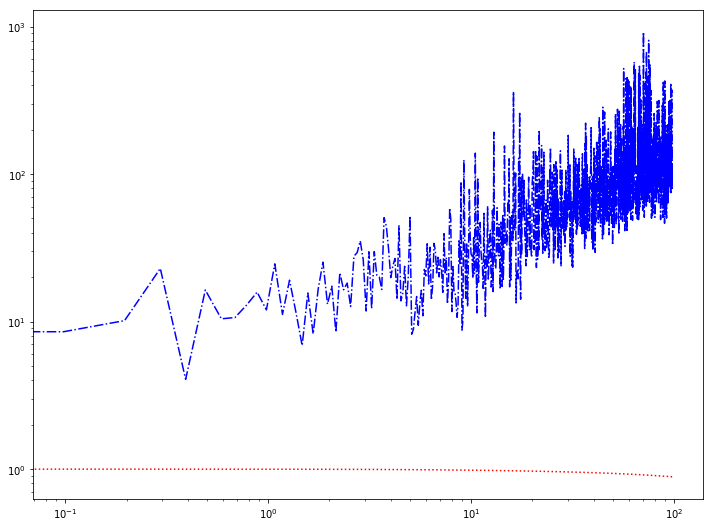

In [11]:
plt.plot(f3['Time']*97781323.9/1.e6,1/f3['std_v']*97781323.9/1.e6,color="blue", linewidth=1.5, linestyle="-.", label="<Z>(simulation)")
#plt.plot(f2['Time']*97781323.9/1.e6,1/f5['avg_v']*97781323.9/1.e6,color="red", linewidth=1.5, linestyle="-.", label="<Z>(simulation)")
plt.plot(f3['Time']*97781323.9/1.e6,f3['Gas']/2.314,color="red", linewidth=1.5, linestyle=":", label="Gas mass")
plt.yscale('log')
plt.xscale('log')

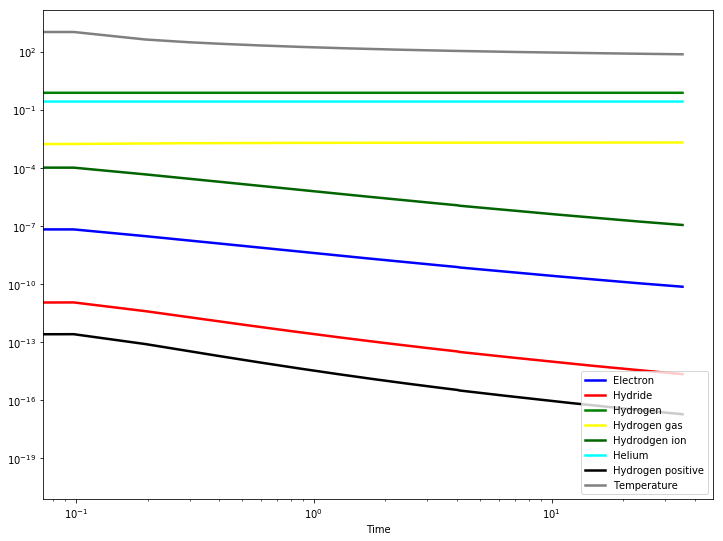

In [30]:
f3["Temperature"][0]=f3["Temperature"][1]
plt.plot(f3['Time']*97781323.9/1.e6,f3["Electron"],color="blue", linewidth=2.5, linestyle="-", label="Electron")
plt.plot(f3['Time']*97781323.9/1.e6,f3["Hydride_ion"],color="red", linewidth=2.5, linestyle="-", label="Hydride")
plt.plot(f3['Time']*97781323.9/1.e6,f3["Hydrogen_atom"],color="green", linewidth=2.5, linestyle="-", label="Hydrogen")
plt.plot(f3['Time']*97781323.9/1.e6,f3["Hydrogen"],color="yellow", linewidth=2.5, linestyle="-", label="Hydrogen gas")
plt.plot(f3['Time']*97781323.9/1.e6,f3["Hydrogen_ion"],color="darkgreen", linewidth=2.5, linestyle="-", label="Hydrodgen ion")
plt.plot(f3['Time']*97781323.9/1.e6,f3["Helium"],color="cyan", linewidth=2.5, linestyle="-", label="Helium")
plt.plot(f3['Time']*97781323.9/1.e6,f3["H2+"],color="black", linewidth=2.5, linestyle="-", label="Hydrogen positive")
#plt.plot(time,kool,color="orange", linewidth=2.5, linestyle="-", label="Dynamic Time")
plt.plot(f3['Time']*97781323.9/1.e6,f3["Temperature"],color="grey", linewidth=2.5, linestyle="-", label="Temperature")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Time")
plt.legend(loc='lower right')